In [1]:
import sys
sys.path.insert(0,'/home/csunix/schtmt/NewFolder/caffe_Sep_anaconda/python')
import numpy as np
import matplotlib.pyplot as plt
import caffe
import h5py
import cv2
import os
import scipy.io
import scipy.misc

caffe.set_device(0)
caffe.set_mode_gpu()

# train on Adam entrance
net = caffe.Net('test2.prototxt',
                '/usr/not-backed-up/MODELS_DATA/models/entrance_iter_540000.caffemodel', 
                caffe.TEST) #570000
# print([(k, v.data.shape) for k, v in net.blobs.items()]) # Python data type: list

In [2]:
import fnmatch
import os
from PIL import Image
frame_path='/usr/not-backed-up/1_DATABASE/Adam dataset/Entrance/TestSeq/'
save_path = '/usr/not-backed-up/1_convlstm/convLSTM_prediction6_entrance/pixel_error'
if not os.path.exists(save_path):
    os.mkdir(save_path)

for seq in range(4,5):
    print(seq)    
    # load images                   
    dirpath = (frame_path + 'Test%d.mat' % (seq+1))
    h5file = h5py.File(dirpath,'r')
    vol = h5file['ims'][:]
    vol = np.transpose(vol,[2,1,0])
    nfr = np.shape(vol)[2]
    print(nfr)
    
#     for fr in range(nfr):            
#         if fr < 9:
#             fr_id = '00%d' % (fr+1)                                       
#         elif fr < 99:
#             fr_id = '0%d' % (fr+1)                
#         else:
#             fr_id = '%d' % (fr+1)                
#         im1 = Image.open(dirpath + '/' + fr_id + '.tif')
#         im1 = np.array(im1.resize((227,227),Image.BILINEAR))#size [width,height]            
#         im1 = np.reshape(im1,[1,227,227])
#         im1 = im1.astype(float) / 255.
#         if fr == 0:
#             frame_seq = im1
#         else:
#             frame_seq = np.append(frame_seq,im1,0)
    
    
    

4
20000


In [18]:
fr = 16011
# fr = 16012
for idx in range(10):
    im = scipy.misc.imresize(vol[:,:,fr+idx],[227,227],interp='bilinear')
    im = np.reshape(im,[1,227,227])
    im = im.astype(float)/255
    if idx == 0:
        cur_vol = im
    else:
        cur_vol = np.append(cur_vol,im,0)                      
print(cur_vol.shape)

(10, 227, 227)


In [19]:
# plt.figure(figsize=(100,100))
# for i in range(10):
# #     print(i)
#     plt.subplot(2,5,i+1)
#     input_ = np.reshape(cur_vol[i,:,:],[227,227]) 
#     plt.imshow(input_,cmap='gray')
#     plt.axis('off') 
# plt.show()    

26.799816879


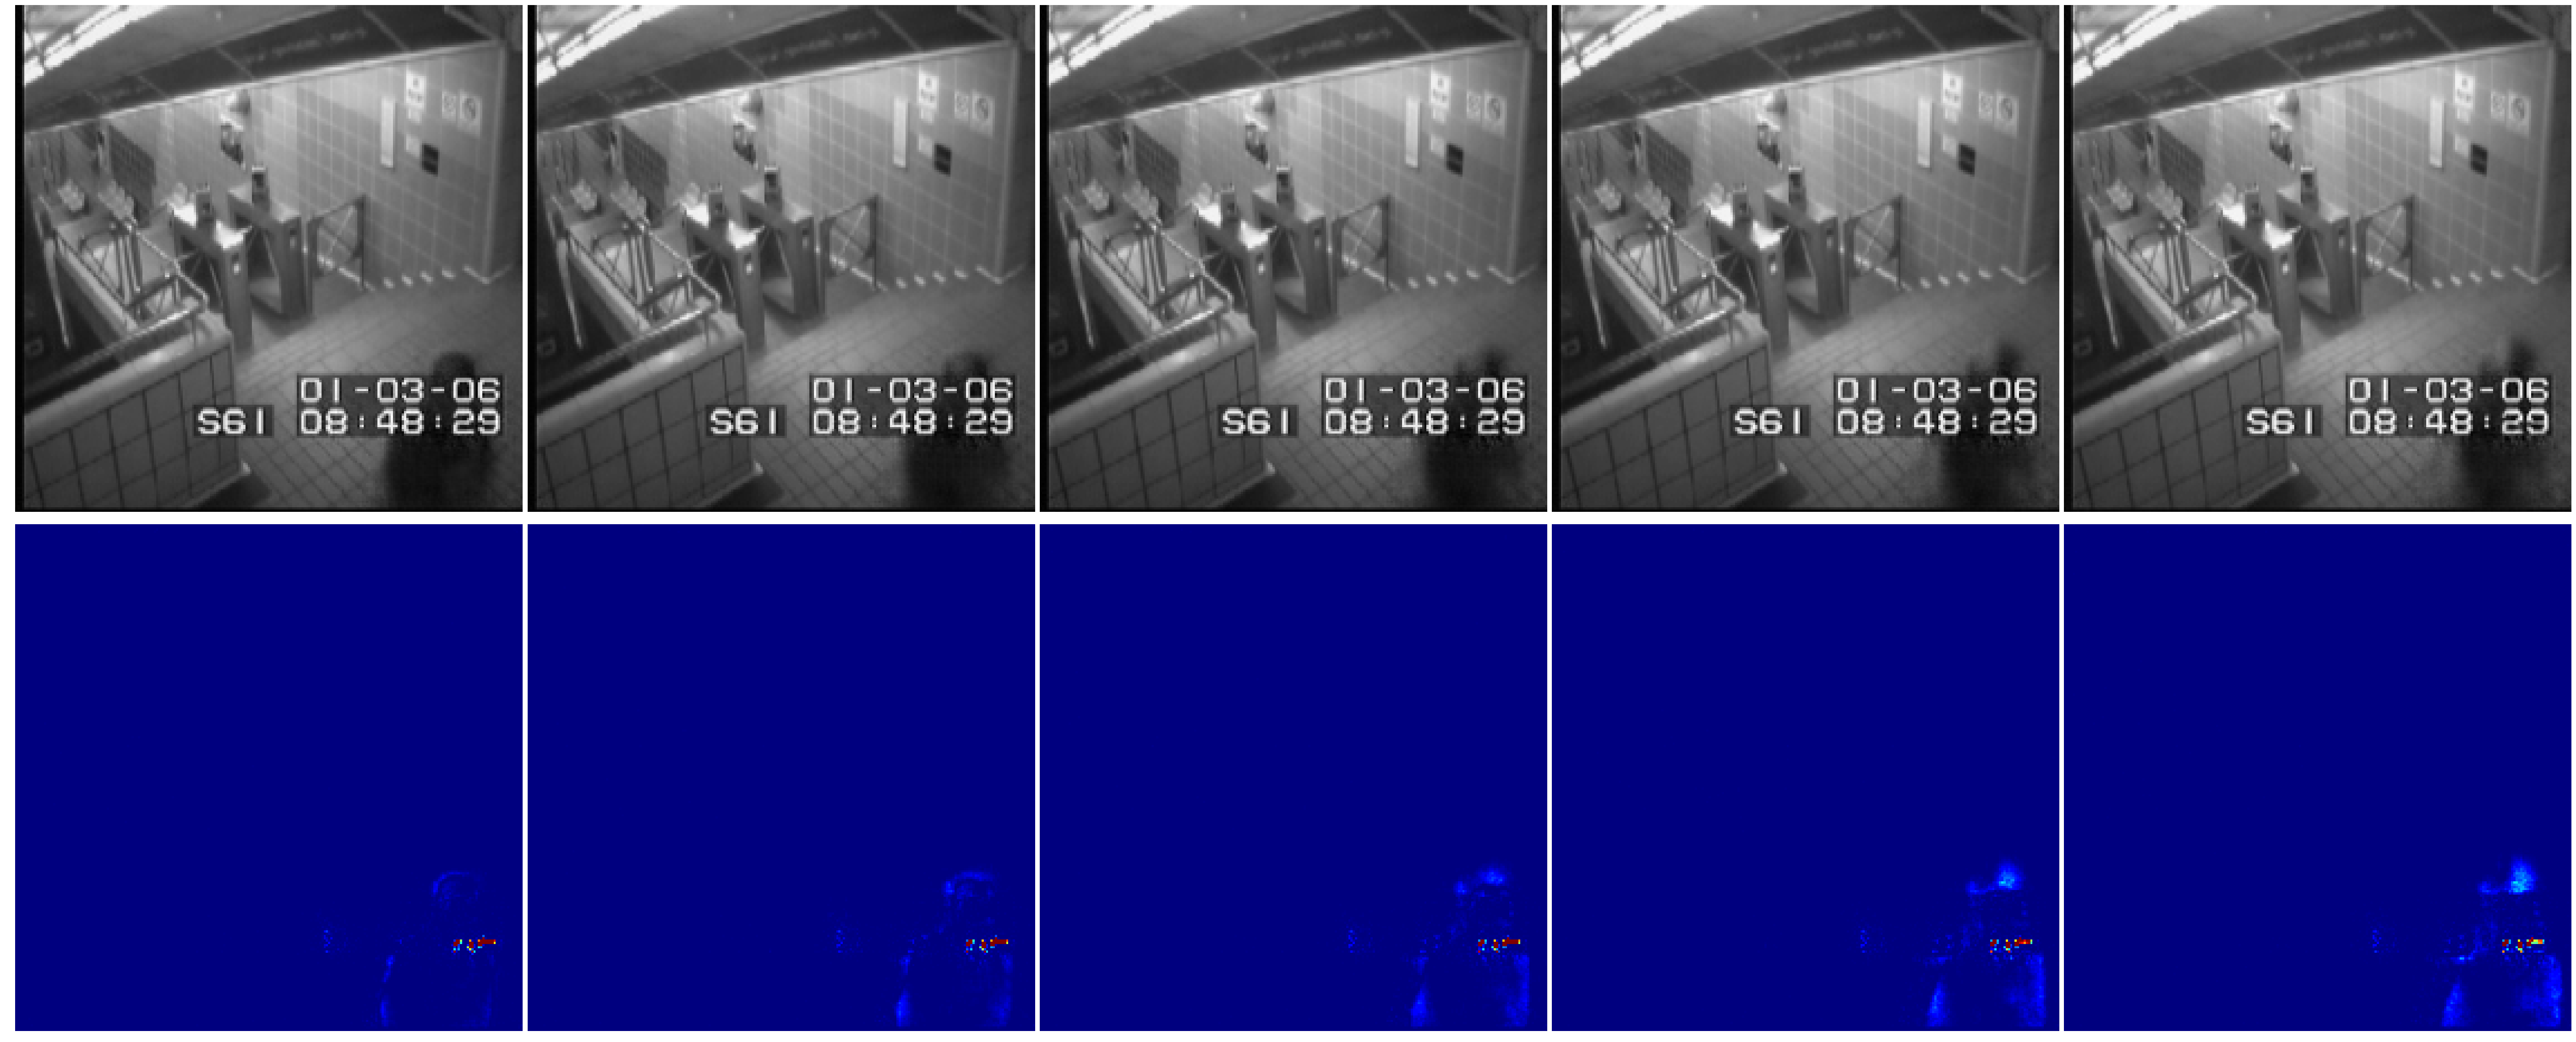

In [20]:
cur_vol = cur_vol.reshape([1,10,1,227,227])
net.blobs['input'].data[...] = cur_vol
out = net.forward()
# reconstruction
pred = net.blobs['deconv3'].data
prediction = cur_vol[:,5:10,:,:,:]
prediction = np.reshape(prediction,[5,1,227,227])
prediction = np.reshape(prediction,[5,227,227])
pred = np.reshape(pred,[5,227,227])
error = np.power(prediction - pred,2)

# Remove Time Stamp noise in Entrance and Exit datasets
# TimeStampMask = np.ones((5,227,227))
# TimeStampMask[:,181:194,81:115] = 0
# TimeStampMask[:,166:194,126:216] = 0
# error = np.multiply(error,TimeStampMask)

err = np.reshape(error,[5,227*227])
err = np.sqrt(np.sum(err,1))
print(np.sum(err))

# import matplotlib.gridspec as gridspec
# plt.figure(figsize=(227,227))
# plt.figure(figsize=(3,5))
# gs1 = gridspec.GridSpec(3,5)
# gs1.update()
plt.figure(figsize=(100,100))
# for i in range(5):
#     plt.subplot(3,5,i+1)
#     #     input_ = np.reshape(prediction[i,:,:,:,:],[227,227])
#     input_ = np.reshape(prediction[i,:,:],[227,227])
#     plt.imshow(input_,cmap='gray')
#     plt.axis('off')
for i in range(5):
#     print(i)
    plt.subplot(2,5,i+1)
    input_ = np.reshape(pred[i,:,:],[227,227]) 
    plt.imshow(input_,cmap='gray')
    plt.axis('off') 
for i in range(5):
    plt.subplot(2,5,i+6)
    input_ = np.reshape(error[i,:,:],[227,227])
#     plt.imshow(input_)
    imgplot = plt.imshow(input_,clim=(0.0,0.2))
    imgplot.set_cmap('jet')
    plt.axis('off') 
plt.subplots_adjust(bottom=0.565,wspace=0.01,hspace=0.00000000001)#for 2 rows
# plt.subplots_adjust(bottom=0.405,wspace=0.01,hspace=0.00000000001)#for 3 rows
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.01,hspace=0.9)
plt.show()
# plt.savefig('entrance_loitering.jpg')

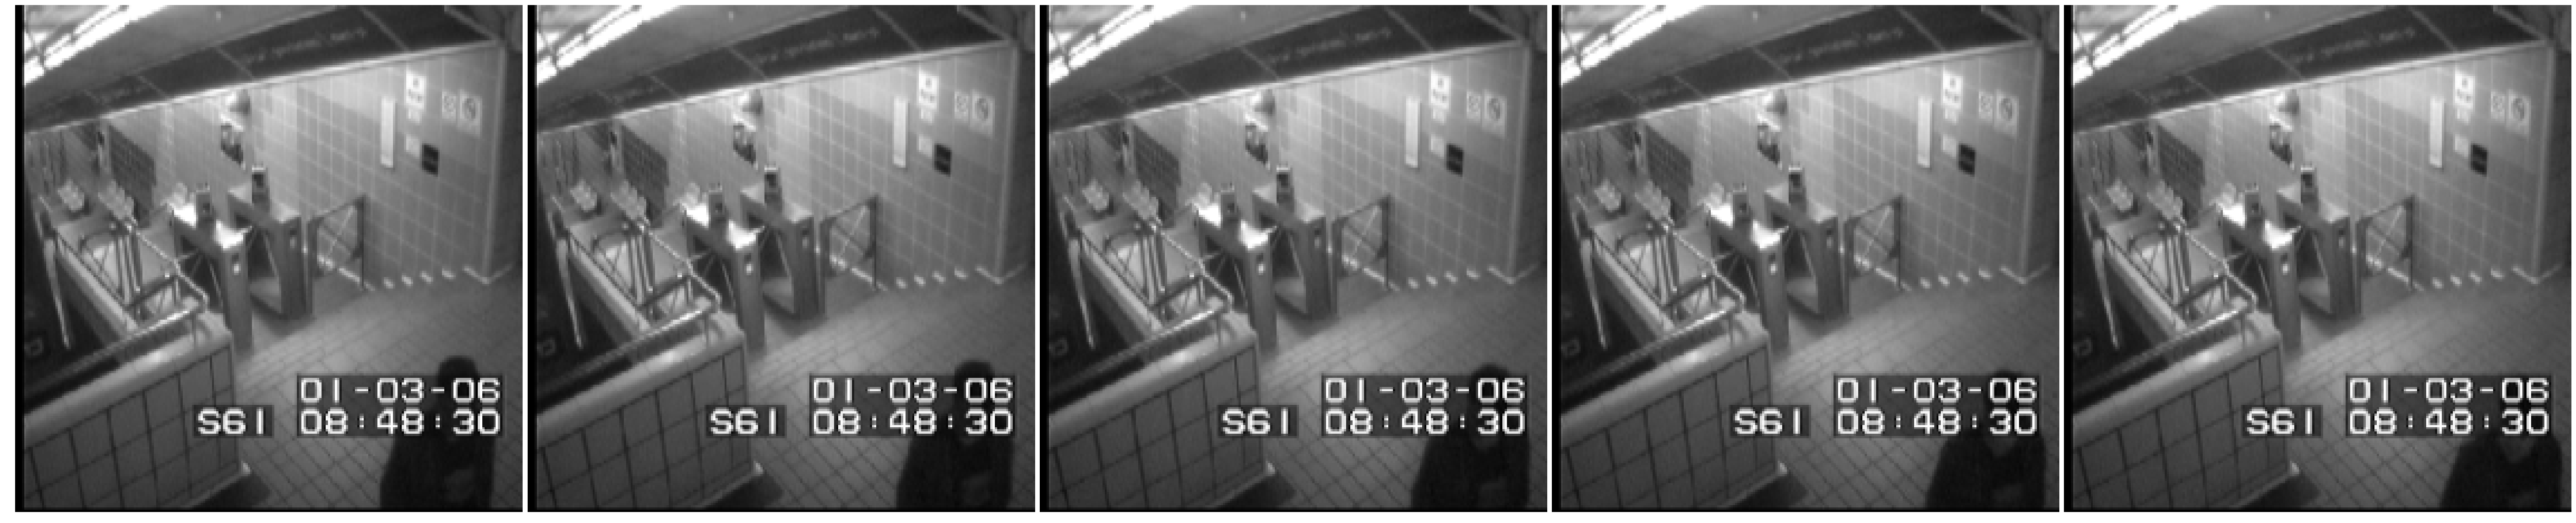

In [8]:
plt.figure(figsize=(100,100))
for i in range(5):
    plt.subplot(1,5,i+1)
    #     input_ = np.reshape(prediction[i,:,:,:,:],[227,227])
    input_ = np.reshape(prediction[i,:,:],[227,227])
    plt.imshow(input_,cmap='gray')
    plt.axis('off')
# 
plt.subplots_adjust(bottom=0.565,wspace=0.01,hspace=0.00000000001)#for 2 rows
plt.show() 
# plt.savefig('entrance_loitering_target.jpg')